# Lesson 3 - Doublets

Think about source and sink flow.  If you look from far enough away, the distance between the source and sink approaches zero.  This flow pattern is called a *doublet*.

## Code:

In [1]:
# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Math:

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2 + y^2}$$

$$u\left(x,y\right) = \frac{\partial{\psi}}{\partial{y}} = -\frac{\kappa}{2\pi}\frac{x^2 - y^2}{\left(x^2 + y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\partial{\psi}}{\partial{x}} = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2 + y^2\right)^2}$$

## Code:

In [2]:
# create meshgrid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X,Y = np.meshgrid(x,y)

### Function Declarations

In [3]:
def get_velocity_doublet(strength, xd, yd, X, Y):
    """
    Returns shut up.
    """
    
    u = -strength/(2*math.pi)*((X-xd)**2 - (Y-yd)**2)/(((X-xd)**2 + (Y-yd)**2)**2)
    v = -strength/(2*math.pi)*(2*(X-xd)*(Y-yd))/(((X-xd)**2 + (Y-yd)**2)**2)
    
    return u,v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    """
    Returns streamfunction
    """
    
    psi = -strength/(2*math.pi)*(Y-yd)/((X-xd)**2 + (Y-yd)**2)
    
    return psi

### Computation:

In [4]:
kappa = 1.0
x_doublet, y_doublet = 0.0, 0.0

u_doublet, v_doublet = get_velocity_doublet(kappa,x_doublet,y_doublet,X,Y)

psi_doublet = get_stream_function_doublet(kappa,x_doublet,y_doublet,X,Y)

### Plots:

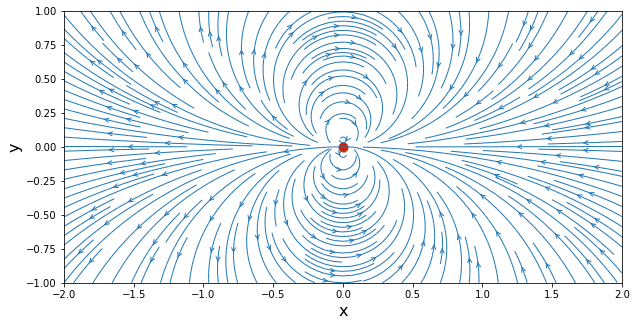

In [5]:
size = 10
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u_doublet, v_doublet, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet,y_doublet,color='#CD2305',s=80,marker='o');

## Uniform flow past a doublet

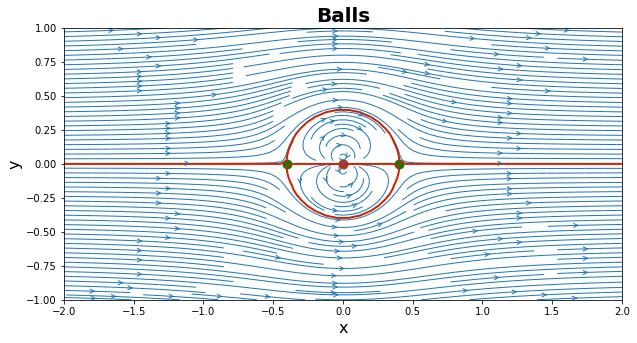

In [11]:
u_inf = 1.0

u_freestream = u_inf * np.ones((N,N), dtype=float)
v_freestream = np.zeros((N,N), dtype=float)

psi_freestream = u_inf * Y

# Superposition
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot streamlines
plt.figure(figsize=(size,(y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.title('Balls', fontsize=20, fontweight='bold')
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')
plt.contour(X, Y, psi, levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')

# calculate stagnation points
x_stag1, y_stag1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stag2, y_stag2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0

# plot stagnation points
plt.scatter([x_stag1, x_stag2], [y_stag1, y_stag2], color='g', s=80, marker='o');

##### Challenge Question:

What is the radius of the cylinder created when a doublet of strength $\kappa$ is added to a uniform flow $U_\infty$ in the $x$-direction?

##### Answer:

$$\psi = \psi_{\text{freestream}} + \psi_{\text{doublet}} = 0$$

$$0 = U_\infty r \sin{\theta} - \frac{\kappa}{2\pi}\frac{\sin{\theta}}{r}$$

$$\frac{\kappa}{2\pi r^2} = U_\infty$$

$$r = \sqrt{\frac{\kappa}{2\pi U_\infty}}$$